#IMPORT LIBERLY

In [0]:
 # load packages
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
# not needed, only to prettify the plots.
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline

# Volatility and Risk

##ดึงข้อมูล

In [0]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

In [79]:
# ===========
today = "2020-01-01"  # to make static this script.
tckr = 'VOO'  
# download data
data = pdr.get_data_yahoo(tckr, "2010-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data = data.asfreq('B')  
data.columns = data.columns.map(lambda col: col.lower())

[*********************100%***********************]  1 of 1 downloaded


In [80]:
data.head(20)  # first values

,open,high,low,close,adj close,volume
Date,,,,,,
2010-09-09,102.500000,102.500000,101.139999,101.320000,83.143929,26500.0
2010-09-10,101.680000,101.860001,101.300003,101.779999,83.521400,8600.0
2010-09-13,102.959999,103.139999,102.500000,103.059998,84.571770,33700.0
2010-09-14,102.839996,103.480003,102.379997,103.040001,84.555374,59400.0
2010-09-15,102.620003,103.379997,102.400002,103.300003,84.768715,9200.0
2010-09-16,103.019997,103.320000,102.699997,103.260002,84.735901,59500.0
2010-09-17,103.879997,103.879997,103.019997,103.360001,84.817970,49300.0
2010-09-20,103.739998,105.040001,103.459999,105.040001,86.196617,19000.0
2010-09-21,105.019997,105.440002,104.279999,104.720001,85.933998,19200.0


In [81]:
prices = data[['close']]
prices = prices.dropna()
prices

,close
Date,
2010-09-09,101.320000
2010-09-10,101.779999
2010-09-13,103.059998
2010-09-14,103.040001
2010-09-15,103.300003
...,...
2019-12-24,295.160004
2019-12-26,296.670013
2019-12-27,296.670013


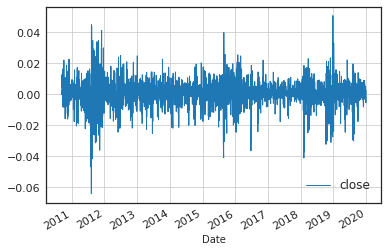

In [82]:
returns = prices.pct_change()
returns = returns.dropna()
returns.plot()

In [83]:
returns.rename(columns={'close':'returns_Vanguard_S&P_500_ETF'},inplace=True)
returns

,returns_Vanguard_S&P_500_ETF
Date,
2010-09-10,0.004540
2010-09-13,0.012576
2010-09-14,-0.000194
2010-09-15,0.002523
2010-09-16,-0.000387
...,...
2019-12-24,0.000000
2019-12-26,0.005116
2019-12-27,0.000000


## Volatility and Risk

In [84]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()


volatility = np.sqrt(mean_squared_deviations)
volatility

returns_Vanguard_S&P_500_ETF    0.008976
dtype: float64

In [85]:
returns.std()

returns_Vanguard_S&P_500_ETF    0.008977
dtype: float64

In [86]:
returns.shape

(2343, 1)

In [87]:
number_of_obs = returns.shape[0]
mean_squared_deviations = squared_deviations.sum()/(number_of_obs-1)
volatility = np.sqrt(mean_squared_deviations)
volatility

returns_Vanguard_S&P_500_ETF    0.008977
dtype: float64

In [88]:
returns.std()

returns_Vanguard_S&P_500_ETF    0.008977
dtype: float64

## Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12. Instead of using the `np.sqrt()` we can raise it to the power of $0.5$

In [89]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

returns_Vanguard_S&P_500_ETF    0.031099
dtype: float64

#Risk Adjusted Returns

## Import_data

In [0]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

#### data_1 Large-Cap

In [91]:
# ===========
today = "2020-01-01"  # to make static this script.
tckr = 'VV'  
# download data
data_1 = pdr.get_data_yahoo(tckr, "2010-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data_1 = data_1.asfreq('B')  
data_1.columns = data_1.columns.map(lambda col: col.lower())

[*********************100%***********************]  1 of 1 downloaded


In [92]:
data_1.head(5)

,open,high,low,close,adj close,volume
Date,,,,,,
2010-01-04,51.119999,51.520000,51.070000,51.480000,42.083466,180300.0
2010-01-05,51.509998,51.689999,51.360001,51.669998,42.238789,210700.0
2010-01-06,51.630001,51.830002,51.580002,51.740002,42.296024,207600.0
2010-01-07,51.669998,51.970001,51.470001,51.939999,42.459515,152800.0
2010-01-08,51.720001,52.110001,51.680000,52.080002,42.573963,117200.0


In [93]:
prices_1 = data_1[['close']]
prices_1 = prices_1.dropna()

prices_1.head()

,close
Date,
2010-01-04,51.480000
2010-01-05,51.669998
2010-01-06,51.740002
2010-01-07,51.939999
2010-01-08,52.080002


In [94]:
returns_1 = prices_1.pct_change()
returns_1 = returns_1.dropna()

returns_1.rename(columns={'close':'returns_Vanguard_US_Large-Cap'},inplace=True)

returns_1.tail()

,returns_Vanguard_US_Large-Cap
Date,
2019-12-24,-0.004855
2019-12-26,0.004878
2019-12-27,-0.000337
2019-12-30,-0.005531
2019-12-31,0.002713


#### data_2_small_cap

In [95]:
# ===========
today = "2020-01-01"  # to make static this script.
tckr = 'VB'  
# download data
data_2 = pdr.get_data_yahoo(tckr, "2010-01-01", today)
# add frequency needed for some pandas functionalities releated with offsets
data_2 = data_2.asfreq('B')  
data_2.columns = data_2.columns.map(lambda col: col.lower())

[*********************100%***********************]  1 of 1 downloaded


In [96]:
data_2.head(5)

,open,high,low,close,adj close,volume
Date,,,,,,
2010-01-04,58.160000,58.689999,57.990002,58.599998,50.489262,353900.0
2010-01-05,58.639999,58.900002,58.330002,58.779999,50.644363,395900.0
2010-01-06,58.709999,59.009998,58.669998,58.820000,50.678822,363800.0
2010-01-07,58.740002,59.240002,58.310001,59.099998,50.920067,202900.0
2010-01-08,59.060001,59.540001,58.880001,59.540001,51.299171,469700.0


In [97]:
prices_2 = data_2[['close']]
prices_2 = prices_2.dropna()
prices_2.head()

,close
Date,
2010-01-04,58.599998
2010-01-05,58.779999
2010-01-06,58.820000
2010-01-07,59.099998
2010-01-08,59.540001


In [98]:
returns_2 = prices_2.pct_change()
returns_2 = returns_2.dropna()

returns_2.rename(columns={'close':'returns_Vanguard_US_Small-Cap'},inplace=True)

returns_2.tail()

,returns_Vanguard_US_Small-Cap
Date,
2019-12-24,-0.004558
2019-12-26,0.001747
2019-12-27,-0.003067
2019-12-30,-0.003016
2019-12-31,0.002299


#### รวมข้อมูล

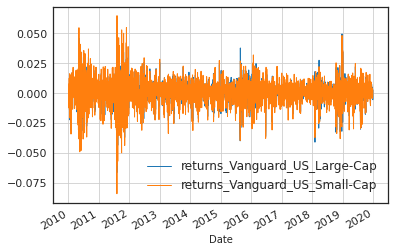

In [99]:
return_join = pd.merge(returns_1, returns_2, on='Date', how="outer")

return_join.plot()

In [100]:
annualized_vol = return_join.std()*np.sqrt(12)
annualized_vol

returns_Vanguard_US_Large-Cap    0.032367
returns_Vanguard_US_Small-Cap    0.039425
dtype: float64

compute the annualized returns as follows:

In [101]:
n_months = return_join.shape[0]
return_per_month = (return_join+1).prod()**(1/n_months) - 1
return_per_month

returns_Vanguard_US_Large-Cap    0.000420
returns_Vanguard_US_Small-Cap    0.000413
dtype: float64

In [102]:
annualized_return = (return_per_month + 1)**12-1

annualized_return = (return_join+1).prod()**(12/n_months) - 1
annualized_return

returns_Vanguard_US_Large-Cap    0.005046
returns_Vanguard_US_Small-Cap    0.004970
dtype: float64

In [103]:
annualized_return/annualized_vol

returns_Vanguard_US_Large-Cap    0.155907
returns_Vanguard_US_Small-Cap    0.126067
dtype: float64

In [104]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

returns_Vanguard_US_Large-Cap   -0.770973
returns_Vanguard_US_Small-Cap   -0.634875
dtype: float64